# Bias Variance Analysis 
* 본 실습 내용
1. Polynomial Regression 모델 만들기
2. Bias and Variance Trade off 관계 이해


## Package Import
* 아래 셀은 필요한 기능을 할 수 있는 함수들 (Pacakge)를 불러오는 과정입니다
---
패키지 설명
* random : 난수 생성 
* numpy : 행렬 연산
* matplotlib.pyplot : 그래프 그리기
* collections : 자료형
* sklearn : 머신러닝 모델 

In [10]:
# Loading Packages
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

## Polynomial regression (다항 회귀)
* Linear Regerssion (선형회귀)의 연장선인 Polynomial Regression (다항 회귀) 모델 생성
* Polynomial Regression 모델로 (degree=2) 원래 함수 (True distribution) 추정
---
기존에 숨겨져 있는, 알려지지 않는 함수가 있을 떄 Polynomial regression을 통해 얼마나 근사시킬 수 있을지 확인해봅시다. <br>
다음과 같은 순서로 진행됩니다. <br>
1. 예측할 함수 생성
2. Polynomial Transform
3. Polynomial regression model 만들기


### 예측할 함수 생성 (degree=3)
* x_ex와 y_ex 변수를 통해 함수 생성
* np.arange(p) 는 주어진 p 값까지로 이루어진 numpy 행렬을 만들라는 것
* plt.plot(x,y) : x 와 y 

In [2]:
# Making polynomial regression model
X_ex = np.arange(5) 
Y_ex =  3 - 2 * X_ex + X_ex ** 2 - X_ex ** 3

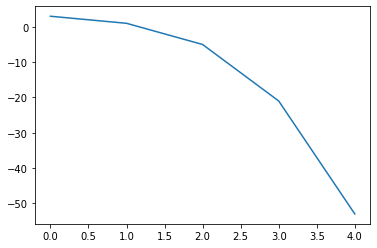

In [3]:
plt.plot(X_ex,Y_ex)

In [4]:
X_ex

array([0, 1, 2, 3, 4])

#### Practice 1. 다항 함수 만들기
1. 정의역 x_temp : 범위가 [0,1,2,3,4,5,6,7,8] 까지의 행렬을 만들기
2. 치역 y_temp = 10 * X_temp**3 + 7 * X_temp -10 만들기
3. Ploting 해보기

In [5]:
X_temp = np.arange(8)
Y_temp = 10*X_temp**3 + 7*X_temp - 10

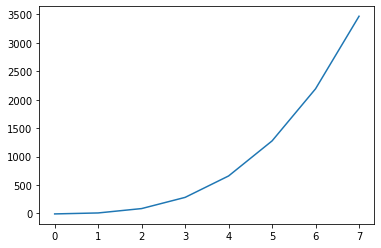

In [6]:
plt.plot(X_temp,Y_temp)

### Polynomial Transform : 일차항을  차수 d 차 항들로 변환
* PolynomialFeatures(degree=d) : input 을 차수가 d 인 다항 features로 바꿔준다
* poly.fit_transform(X[:, np.newaxis]) : poly 라는 instnace에, X_ex 데이터를 input으로 넣는다. np.newaxis (차원을 추가)
* ex ) degree =3 , input : x -> output : c(상수), x , x^2 , x^3 

In [7]:
poly = PolynomialFeatures(degree=2)
X_ex_trans = poly.fit_transform(X_ex[:, np.newaxis])

print("Input")
print(X_ex)
print("Output of Polynomial Features")
print(X_ex_trans)
for row in range(X_ex_trans.shape[0]):
    print("constant : {}, x1 : {}, x1**2 : {}".format(X_ex_trans[row,0],X_ex_trans[row,1], X_ex_trans[row,2] ))

Input
[0 1 2 3 4]
Output of Polynomial Features
[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]
constant : 1.0, x1 : 0.0, x1**2 : 0.0
constant : 1.0, x1 : 1.0, x1**2 : 1.0
constant : 1.0, x1 : 2.0, x1**2 : 4.0
constant : 1.0, x1 : 3.0, x1**2 : 9.0
constant : 1.0, x1 : 4.0, x1**2 : 16.0


In [8]:
print("X_ex shape : {} , X_ex[:,np.newaxis] shape : {}".format(X_ex.shape, X_ex[:,np.newaxis].shape))

X_ex shape : (5,) , X_ex[:,np.newaxis] shape : (5, 1)


#### Practice 2. Polynomial Features 만들기
1. degree = 3 인 Polynomial Feature 를 poly_practice로 선언해보세요
2. input X_ex를 1에서 선언한 poly_practice를 이용하여 변환해 보세요
3. 변환 결과를 출력해보세요

In [11]:
poly_practice = PolynomialFeatures(degree=3)
X_ex_trans = poly_practice.fit_transform(X_ex[:, np.newaxis])

print("Input")
print(X_ex)
print("Output of Polynomial Features")
print(X_ex_trans)
for row in range(X_ex_trans.shape[0]):
    print("constant : {}, x1 : {}, x1**2 : {}, x1**3 : {}".format(X_ex_trans[row,0],X_ex_trans[row,1], X_ex_trans[row,2], X_ex_trans[row,3] ))

Input
[0 1 2 3 4]
Output of Polynomial Features
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]
constant : 1.0, x1 : 0.0, x1**2 : 0.0, x1**3 : 0.0
constant : 1.0, x1 : 1.0, x1**2 : 1.0, x1**3 : 1.0
constant : 1.0, x1 : 2.0, x1**2 : 4.0, x1**3 : 8.0
constant : 1.0, x1 : 3.0, x1**2 : 9.0, x1**3 : 27.0
constant : 1.0, x1 : 4.0, x1**2 : 16.0, x1**3 : 64.0


### Polynomial Regression : Polynomial Transfrom + Linear regression
* Polynomial regression을 통해 input x 와 y를 학습
---
* Pipeline : sklearn에서 제공하는 함수들을 엮어서 하나의 함수로 변환
* model.fit(X,Y) : input X와 Y 를 통해 model을 학습한다
* model.named_steps['linear'].coef_ : linear 이름의 함수의 계수 (coefficent)를 가져온다
* plt.scatter(x,y) : x, y 좌표를 찍은 산포도를(Scatter plot) 생성한다
* plt.lengend() : 범례 추가

In [12]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model.fit(X_ex[:, np.newaxis], Y_ex)
coefs = model.named_steps['linear'].coef_
print("Final Equation : y = {:.2f} + {:.2f}*x1 + {:.2f}*(x1**2)".format(
    coefs[0],coefs[1],coefs[2]
))
print("Original Equation y =  3 - 2 * x1 + (x1 ** 2) - (x1**3)")

Final Equation : y = 1.80 + 6.60*x1 + -5.00*(x1**2)
Original Equation y =  3 - 2 * x1 + (x1 ** 2) - (x1**3)


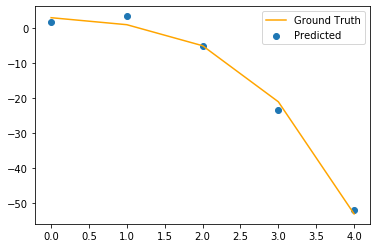

In [13]:
Y_ex_pred = model.predict(X_ex[:, np.newaxis])
plt.scatter(X_ex,Y_ex_pred,label='Predicted')
plt.plot(X_ex,Y_ex,label='Ground Truth',color='orange')
plt.legend()

#### Practice 3. Polynomial Regression 만들기 
1. degree = 3 인 Polynomial Regression 를 model_practice로 선언해보세요
2. X_ex, Y_ex input으로 model_practice을 학습해보세요
3. model_practice 의 계수를 출력해보세요 (상수포함 4개)
4. Ground Truth와 Predicted 값을 그래프를 그려보세요

In [14]:
model_practice = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
model_practice.fit(X_ex[:, np.newaxis], Y_ex)
coefs = model_practice.named_steps['linear'].coef_
print("Final Equation : y = {:.2f} + {:.2f}*x1 + {:.2f}*(x1**2) + {:.2f}*(x1**3)".format(
    coefs[0],coefs[1],coefs[2], coefs[3]
))
print("Original Equation y =  3 - 2 * x1 + (x1 ** 2) - (x1**3)")

Final Equation : y = 3.00 + -2.00*x1 + 1.00*(x1**2) + -1.00*(x1**3)
Original Equation y =  3 - 2 * x1 + (x1 ** 2) - (x1**3)


## Polynomial Regression 을 이용하여 Sine graph 예측하기
* Polynomial 모델을 이용하여 다항 함수가 아닌 sine 함수를 근사해보도록 합시다
1. 먼저 sine 함수 식을 통해서 Synthetic 데이터를 생성합니다
2. Synthetic 데이터에 noise를 일부 추가하고, Train/Test set으로 나눕니다. 
3. Train set을 이용하여 모델을 학습하고 Test set을 이용하여 모델의 성능을 평가합니다
4. Regression 문제의 성능 지표인 Mean Squared loss와 Bias , Variance를 측정해봅니다


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

In [2]:
np.random.seed(10)
random.seed(10)

def get_y_true(x): # 실제 sin graph
    y = np.sin(x)
    return y

def get_y_noise(x): # Sin + Random Noise
    y = get_y_true(x) + np.random.uniform(-0.4, 0.4, len(x))
    return y

def get_sample(sample_ratio, x, y): # x, y 에서 sample ratio 만큼 추출
    m = len(x)
    m_new = int(np.round(sample_ratio*m))
    ind = random.sample(range(m), m_new)
    ind = np.sort(ind)
    x_sample = x[ind]
    y_sample = y[ind]
    y_true_sample = get_y_true(x_sample)
    return x_sample, y_sample, y_true_sample

### Sine Graph Data 만들기
* np.linspace(a,b,c) : 범위 a ~ b 만큼 구간을 c 개 나누기

Text(0.5, 1.0, 'True Distribution')

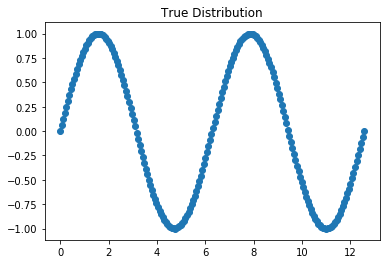

In [3]:
random.seed(10)
x_num = 200
x_space = np.linspace(0,np.pi*4,x_num) # divide the space 0 to 10 in 100 pieces!
y = get_y_true(x_space) # sine function
plt.scatter(x_space,y) # Draw scatter plot
plt.title("True Distribution")


Split Train, Test Dataset

In [4]:
np.random.seed(10)
rand_indicies = list(range(0,x_num))
random.shuffle(rand_indicies)
rand_idicies_train, rand_idicies_test =rand_indicies[:int(x_num*0.8)], rand_indicies[int(x_num*0.8):]
x_train = x_space[rand_idicies_train]
y_train = get_y_noise(x_train)

x_test = x_space[rand_idicies_test]
y_test = get_y_noise(x_test)

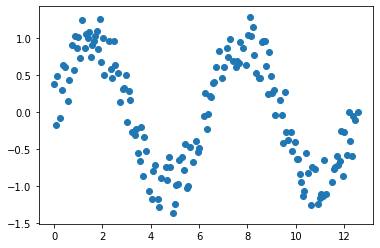

In [5]:
plt.scatter(x_train,y_train) # Train data

Text(0.5, 1.0, 'Test Data')

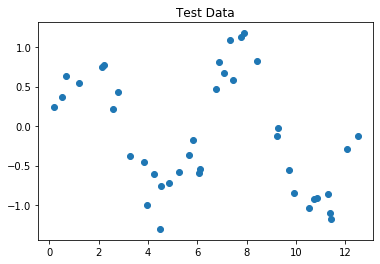

In [6]:
plt.scatter(x_test,y_test)
plt.title("Test Data")

### Polynomial Regression (degree 1) 로 Sine graph 예측

In [7]:
model = Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))])
model.fit(x_train[:, np.newaxis], y_train)
y_predict = model.predict(x_train[:,np.newaxis])

Text(0.5, 1.0, 'Ground Truth VS Predicted')

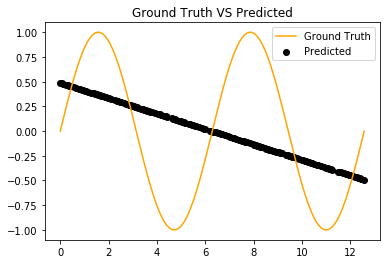

In [8]:
plt.scatter(x_train,y_predict, label='Predicted', color ='black')
plt.plot(x_space,y, label = 'Ground Truth', color='orange')
plt.legend()
plt.title("Ground Truth VS Predicted")

In [11]:
# Dictionary for containing the results
result_dict = defaultdict(dict)

#### Mean Square Error 게산하기
* mean_square_error(y1, y2) : y1 와 y2 mean squared error를 계산한다

In [12]:
y_test_predict = model.predict(x_test[:,np.newaxis])
## check Train, Test mse
mse_train = mean_squared_error(y_train,y_predict)
mse_test = mean_squared_error(y_test,y_test_predict)
result_dict[1]['mse_train'] = mse_train
result_dict[1]['mse_test'] = mse_test
print("mse Train : {}, Test : {}".format(mse_train,mse_test))

mse Train : 0.456555897331168, Test : 0.4686182390294487


#### Bias 와 Variance 계산하기

1. Train data 에서 train sample 뽑기
2. Train sample 를 이용하여 Polynomial regression model 학습
3. Sample이 아닌 전체 train data 를 이용하여 모델의 예측값 계산
4. 1,3 을 1000번 반복하면서 모델의 예측값 3 의 평균 계산 (exp_f_x)
5. Bias and Variance 계산
---
np.linear.norm(x) : x라는 행렬의 2 norm을 계산해라

In [13]:
random.seed(10)
num_sampling = 1000
degree = 1

model_list = []
exp_f_x = np.zeros(len(x_train))

for i in range(num_sampling):
    x_train_sample, y_train_sample, y_train_true = get_sample(sample_ratio=0.3,x=x_train,y=y_train)
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                  ('linear', LinearRegression(fit_intercept=False))])
    model.fit(x_train_sample[:, np.newaxis], y_train_sample)
    exp_f_x += model.predict(x_train[:, np.newaxis])
    model_list.append(model)


exp_f_x/=num_sampling
bias = (np.linalg.norm(exp_f_x-y_train))

var = 0
for j in range(num_sampling):
    model = model_list.pop(0)
    var = var + np.square(model.predict(x_train[:, np.newaxis])-exp_f_x)
var = var/num_sampling
variance = np.linalg.norm(var)

result_dict[1]['bias'] = bias
result_dict[1]['var'] = variance
print("degree : {} bias : {} variance : {}".format(degree, bias,variance) )

degree : 1 bias : 8.547223087599878 variance : 0.14839642346308748


### Practice 4 : Make Polynoimal Regression model with degree 5
1. Compute the Train , Test MeanSquare Error
2. Compute Bias and Variance

Text(0.5, 1.0, 'Ground Truth VS Predicted')

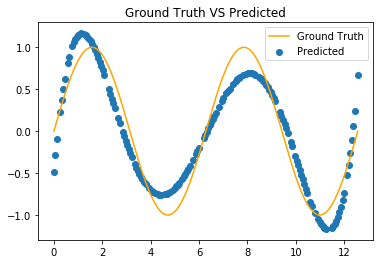

In [14]:
model = Pipeline([('poly', PolynomialFeatures(degree=5)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(x_train[:, np.newaxis], y_train)

y_predict = model.predict(x_train[:, np.newaxis])  # 예측하는 method를 쓰세요

plt.scatter(x_train,y_predict, label='Predicted')
plt.plot(x_space,y, label = 'Ground Truth', color='orange')
plt.legend()
plt.title("Ground Truth VS Predicted")

In [15]:
y_test_predict = model.predict(x_test[:, np.newaxis])
## check Train, Test mse
mse_train = mean_squared_error(y_train, y_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
result_dict[5]['mse_train'] = mse_train
result_dict[5]['mse_test'] = mse_test
print("mse Train : {}, Test : {}".format(mse_train,mse_test))

mse Train : 0.09843459452995856, Test : 0.10757329836083991


#### Compute Bias and Variance

In [16]:
random.seed(10)
num_sampling = 1000
degree = 5

model_list = []
exp_f_x = np.zeros(len(x_train))

for i in range(num_sampling):
    x_train_sample, y_train_sample, y_train_true = get_sample(sample_ratio=0.3, x=x_train, y=y_train) # Sample 를 뽑아주는 함수 (Sample ratio = 0.3)
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression(fit_intercept=False))])
    model.fit(x_train_sample[:, np.newaxis], y_train_sample)
    exp_f_x += model.predict(x_train[:, np.newaxis])
    model_list.append(model)


exp_f_x/=num_sampling
bias = np.linalg.norm(exp_f_x-y_train)
var = 0
for j in range(num_sampling):
    model = model_list.pop(0)
    var = var + np.square(model.predict(x_train[:, np.newaxis])-exp_f_x) # exp_f_X 과 예측값과의 차이의 제곱!
var = var/num_sampling
variance = np.linalg.norm(var)
result_dict[5]['bias'] = bias
result_dict[5]['var'] = variance
print("degree : {} bias : {} variance : {}".format(degree, bias,variance) )

degree : 5 bias : 4.001578134237167 variance : 0.5820508465240941


### Degree 에 따른 Bias/Variance 비교

Text(0.5, 1.0, 'Bias & Variance of degree 1, 5')

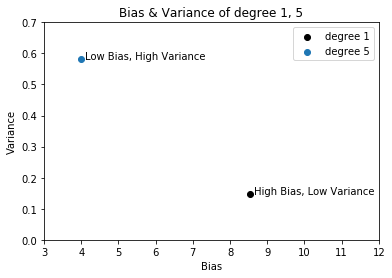

In [17]:
plt.scatter(result_dict[1]['bias'],result_dict[1]['var'], label='degree 1', color='black')
plt.text(result_dict[1]['bias'] + 0.1,result_dict[1]['var'], "High Bias, Low Variance")
plt.scatter(result_dict[5]['bias'],result_dict[5]['var'], label='degree 5')
plt.text(result_dict[5]['bias'] + 0.1 ,result_dict[5]['var'], "Low Bias, High Variance")

plt.legend()
plt.xlim(3,12)
plt.ylim(0,0.7)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.title("Bias & Variance of degree 1, 5")

degree 가 1,2,3,5,10,12 로 증가함에 따라 Bias and Variance 가 어떻게 바뀌는지 확인해봅시다

In [18]:
degree_list = [1,2,3,5,10,12]
for d in degree_list:
    model_list = []
    mse_train = 0
    mse_test = 0
    exp_f_x = np.zeros(len(x_train))
    for i in range(num_sampling):
        x_train_sample, y_train_sample, y_train_true = get_sample(sample_ratio=0.40,x=x_train,y=y_train)
        model = Pipeline([('poly', PolynomialFeatures(degree=d)),
                      ('linear', LinearRegression(fit_intercept=False))])
        model.fit(x_train_sample[:, np.newaxis], y_train_sample)
        
        
        # For mse
        y_train_sample_predict = model.predict(x_train_sample[:, np.newaxis])
        y_test_predict = model.predict(x_test[:,np.newaxis])
        mse_train += mean_squared_error(y_train_sample,y_train_sample_predict)
        mse_test += mean_squared_error(y_test,y_test_predict)
        
        exp_f_x += model.predict(x_train[:, np.newaxis])
        model_list.append(model)

    mse_train /= num_sampling
    mse_test /= num_sampling
    exp_f_x/=num_sampling

    # Bias
    bias = (np.linalg.norm(exp_f_x-y_train))
    
    # Variance
    var = 0
    for j in range(num_sampling):
        model = model_list.pop(0)
        var = var + np.square(model.predict(x_train[:, np.newaxis])-exp_f_x)
    var = var/num_sampling
    variance = np.linalg.norm(var)
    print("degree : {} bias : {} variance : {}".format(d, bias,variance) )

    result_dict[d] = {'bias':bias,'var':variance,'mse_train':mse_train,'mse_test':mse_test}

degree : 1 bias : 8.547073989291494 variance : 0.09886979326669194
degree : 2 bias : 8.540696855129692 variance : 0.13982086215643774
degree : 3 bias : 7.990273731070952 variance : 0.34513599910574055
degree : 5 bias : 3.9770129663302987 variance : 0.32913580528592934
degree : 10 bias : 2.7485482392727567 variance : 0.8719978197361746
degree : 12 bias : 2.7253266507034266 variance : 3.3796979519514596


In [23]:
result_dict[1]['bias']
result_dict[1]['var']


0.09886979326669194

Text(0.5, 1.0, 'Bias & Variance ')

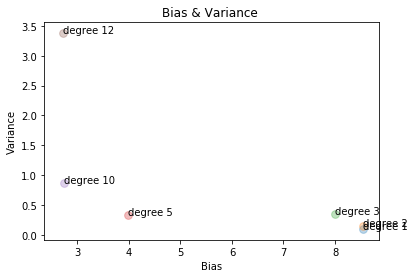

In [26]:
for d in degree_list:
    plt.scatter(result_dict[d]['bias'], result_dict[d]['var'], s=60, label='degree {}'.format(d),
                alpha=0.3)
    plt.text(result_dict[d]['bias'],result_dict[d]['var'],'degree {}'.format(d))

plt.xlabel("Bias")
plt.ylabel("Variance")
plt.title("Bias & Variance ")

In [27]:
bias_list = []
variance_list = []
train_mse_list = []
test_mse_list = []
for d in degree_list:
    bias_list.append(result_dict[d]['bias'])
    variance_list.append(result_dict[d]['var'])
    train_mse_list.append(result_dict[d]['mse_train'])
    test_mse_list.append(result_dict[d]['mse_test'])

Text(0.5, 1.0, 'Bias and Variance Trade off')

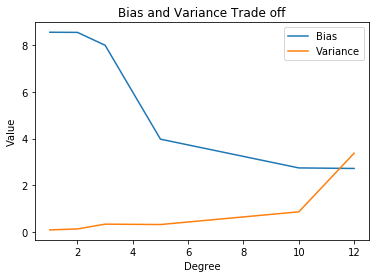

In [28]:
plt.plot(degree_list,bias_list, label='Bias')
plt.plot(degree_list,variance_list, label='Variance')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Value")
plt.title("Bias and Variance Trade off")

Text(0.5, 1.0, 'Train and Test mse')

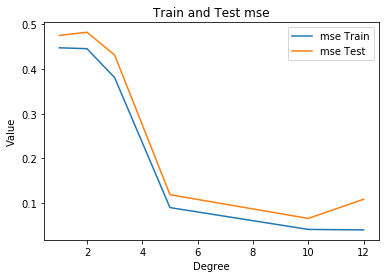

In [29]:
plt.plot(degree_list,train_mse_list, label= 'mse Train')
plt.plot(degree_list,test_mse_list, label='mse Test')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Value")
plt.title("Train and Test mse")

### Degree 가 커질수록 항상 좋을까요?
그래프를 그려보면 degree가 증가할수록 Train, Test MSE 감소하는 경향을 볼 수 있습니다 <br>
과연 Degree가 클수록 항상 좋은걸까요? <br>
Degree가 증가하면, Train data를 잘 학습하여셔 Bias는 감소합니다. <br>
하지만 Training Data에 노이즈가 강하게 들어가 있으면 어떻게 될까요? <br>
노이즈 마저 학습하여 Test MSE가 오히려 더 높아질 수 있습니다 . 아래 실습을 통해 해당 상황을 알아봅시다

---
먼저 -20. -1 범위에서 추출한 y_noise data에 넣어줍시다

Text(0.5, 1.0, 'Train Data with noise')

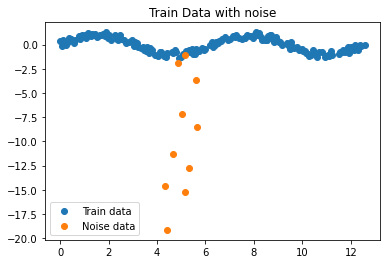

In [43]:
random.seed(10)
x_noise = [random.uniform(4,6) for i in range(10)]
y_noise = [random.uniform(-20,-1) for i in range(10)]
plt.scatter(x_train,y_train, label='Train data')
plt.scatter(x_noise,y_noise, label='Noise data')
plt.legend()
plt.title("Train Data with noise")

In [44]:
x_train_noise = np.append(x_train,x_noise)
y_train_noise = np.append(y_train,y_noise)

#### Practice 5
* 위에서 배운 방법들을 이용해서 데이터에 노이즈가 심한 상황에서 Degree가 5, 10 일 때의 다음 값들을 구하세요
* Bias , Variance, Train mse , Test mse  
* Ground Truth (y_true) 와 Predicted 비교


In [45]:
result_dict = defaultdict(dict)

#### Case1 : Degree 5

mse Train : 0.9640609236912981 Test : 0.9707441973507234


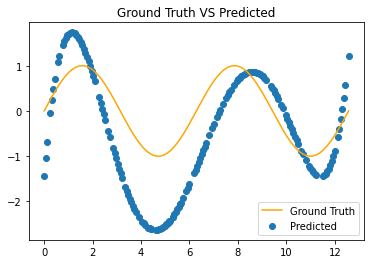

In [29]:
model = ??

model.??

y_predict = ??

plt.scatter(x_train_noise,y_predict, label='Predicted')
plt.plot(x_space,y, label = 'Ground Truth', color='orange')
plt.legend()
plt.title("Ground Truth VS Predicted")

y_true = ??
y_test_predict = ??
y_test_true = ??

## check Train, Test mse
mse_train = ??
mse_test = ??
result_dict[5]['mse_train'] = mse_train
result_dict[5]['mse_test'] = mse_test
print("mse Train : {} Test : {}".format(mse_train,mse_test))
    
# # Variance, Bias
# mse = np.mean((y_predict - y_true) ** 2)
# var = np.var(y_predict)
# bias = abs(mse - var)
# print("Variance : {} \nBias : {}".format(var,bias))

In [30]:
random.seed(10)
num_sampling = 1000
degree = 5

model_list = []
exp_f_x = np.zeros(len(x_train_noise))

for i in range(num_sampling):
    x_train_sample, y_train_sample, y_train_true = ?? # Sample 를 뽑아주는 함수
    model = ??
    model.?? # Model을 train 해주는 method
    exp_f_x += ??
    model_list.append(model)

exp_f_x/=num_sampling
bias = ??
var = 0
for j in range(num_sampling):
    model = model_list.pop(0)
    var = var + ??
var = var/num_sampling
variance = ??
result_dict[5]['bias'] = bias
result_dict[5]['var'] = variance
print("degree : {} bias : {} variance : {}".format(degree, bias,variance) )

degree : 5 bias : 31.32933115564707 variance : 11.101795868478233


#### Case 2 : Degree 10

mse Train : 1.2496113009169065 Test : 1.2307568794076236


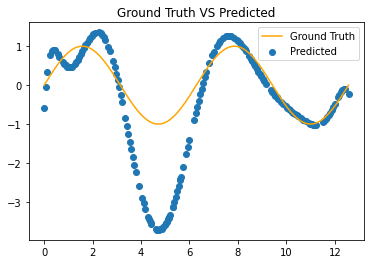

In [31]:
model = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(x_train_noise[:, np.newaxis], y_train_noise)

y_predict = model.predict(x_train_noise[:,np.newaxis])

plt.scatter(x_train_noise,y_predict, label='Predicted')
plt.plot(x_space,y, label = 'Ground Truth', color='orange')
plt.legend()
plt.title("Ground Truth VS Predicted")

y_true = np.sin(x_train_noise)
y_test_predict = model.predict(x_test[:,np.newaxis])
y_test_true = np.sin(x_test)

## check Train, Test mse
mse_train = mean_squared_error(y_true,y_predict)
mse_test = mean_squared_error(y_test_true,y_test_predict)
result_dict[10]['mse_train'] = mse_train
result_dict[10]['mse_test'] = mse_test
print("mse Train : {} Test : {}".format(mse_train,mse_test))
    
# # Variance, Bias
# mse = np.mean((y_predict - y_true) ** 2)
# var = np.var(y_predict)
# bias = (mse - var)
# print("Variance : {} \nBias : {}".format(var,bias))

* More degree of model, gives more flexibility in decision boundarys.
* More prone to overfit

In [32]:
random.seed(10)
num_sampling = 1000
degree = 10

model_list = []
exp_f_x = np.zeros(len(x_train_noise))

for i in range(num_sampling):
    x_train_sample, y_train_sample, y_train_true = ?? # Sample 를 뽑아주는 함수
    model = ??
    model.?? # Model을 train 해주는 method
    exp_f_x += ??
    model_list.append(model)

exp_f_x/=num_sampling
bias = ??
var = 0
for j in range(num_sampling):
    model = model_list.pop(0)
    var = var + ??
var = var/num_sampling
variance = ??
result_dict[10]['bias'] = bias
result_dict[10]['var'] = variance
print("degree : {} bias : {} variance : {}".format(degree, bias,variance) )

degree : 10 bias : 30.20053331490037 variance : 27.092010199683592


#### Bias and Variance Trade off Graph

In [46]:
bias_list = []
variance_list = []
train_mse_list = []
test_mse_list = []
degree_list = [5,10]
for d in degree_list:
    bias_list.append(result_dict[d]['bias'])
    variance_list.append(result_dict[d]['var'])
    train_mse_list.append(result_dict[d]['mse_train'])
    test_mse_list.append(result_dict[d]['mse_test'])

KeyError: 'bias'

In [ ]:
plt.plot(degree_list,bias_list, label='Bias')
plt.plot(degree_list,variance_list, label='Variance')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Value")
plt.title("Bias and Variance Trade off")

#### MSE Graph

In [ ]:
plt.plot(degree_list,train_mse_list, label= 'mse Train')
plt.plot(degree_list,test_mse_list, label='mse Test')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Value")
plt.title("Train and Test mse")